<h1>Projet customer churn</h1>

<h3>Problematique</h3> </br>
<p> Une entreprise de la place fait face a de nombreux problemes notament la fidelisation de ses clients. Pour ce faire elle fait appel a nos service de datascientiste afin de mieux comprendre le comportement de ses clients dans l'optique de les fidelise. <strong>Pour resoudre ce problemme , nous allons creer des modeles de machine learning  qui pouront predire les clients qui sont succeptibles de se desabonner. cela permettra donc a l'entreprise de mieux cibler et fideliser les clients presentant un risque plus eleve de desabonnement.</strong></p>

<h3 style="color:orange;">Importation des outils</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE







### Importation des donnees

In [2]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### La variable cible ici est la variable churn
### qui represete le fait qu'un client s'est desabonne ou pas

### Etant donne que les donnees sont de type categoriel il sagit d'un probleme de classification binaire car churn prend deux valeurs 'yes' ou 'no'

#### Affichage des infos sur le dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### nombre de valeur unique pour chaque colonne

In [4]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<h2 style="color:orange;">Analyse exploratoire des donnees</h2>


In [5]:
# ======| recuperation des variable categorielle |===========

variable_categorielle = data.nunique()[data.nunique() < 5].keys().to_list()

variable_categorielle

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [6]:
# for i in variable_categorielle:
#     print(data[i].value_counts(normalize = True))

#### Construction de graphique

In [7]:
# ======| fonction de constructions de graphiques |=======

def diag_bar(colonne):
    data[colonne].value_counts(normalize = True).plot(kind = 'bar')
    plt.ylabel('proportion')
    plt.title('Distribution de ' + str(colonne))
    return plt.show()

In [8]:
# =======| Graphique interactive |=========
interact(diag_bar, colonne = variable_categorielle)

interactive(children=(Dropdown(description='colonne', options=('gender', 'SeniorCitizen', 'Partner', 'Dependen…

<function __main__.diag_bar(colonne)>

La variable total charge indique le montant total facture au client.

#### Echantillonement de la variable TotalCharges dans le but de commprendre pourquoi elle est interprete comme chaine de caractere.

In [9]:
# print(data['TotalCharges'][3826])
print(data['TotalCharges'].sample(10))
# nous remarquons que la ligne 1082 contient un espace ce qui 
# transforme le type de la colonne TotalCharge en string


658        35.9
2110      65.95
5799      446.1
4542       2570
5206     2313.8
3033     7553.6
5987      20.35
6070    4976.15
3298       83.3
4494     235.05
Name: TotalCharges, dtype: object


#### Remplacement des espace par des NaN

In [10]:
data.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5308,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No
3444,3739-YBWAB,Male,0,Yes,No,36,No,No phone service,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,35.35,1317.95,No


In [11]:
#Variable quantitatives

colonnes_numerique = ['tenure', 'MonthlyCharges', 'TotalCharges']

# fonction permettant de construire l'instograme de maniere interactive

def hist_plot(colonne):
    sns.displot(data[colonne], kde=False)
    plt.title('Histogramme de '+ str(colonne))
    return plt.show()

data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)


In [12]:
# =========| Graphique interactif |=========
interact(hist_plot, colonne = colonnes_numerique)

interactive(children=(Dropdown(description='colonne', options=('tenure', 'MonthlyCharges', 'TotalCharges'), va…

<function __main__.hist_plot(colonne)>

#### Calcul du coeficient d'asymetrie de la variable TotalCharges

In [13]:
print(f'Coeficient d\'asymetrie = {data["TotalCharges"].skew()}')


Coeficient d'asymetrie = 0.961642499724251


#### Etant donne que pour des distribution respectant la loi normale le coeficient d'asymetrie est 0 et pour les distribution moyenne elle est proche de 0 il est donc claire que notre variable TotalCharges est tres asymetrique

#### Effectuons des transformation pour rendre la variable beaucoup plus symetrique

In [14]:
#fonction permettant de construir les boites a moustaches interactives afin de 
#voir si nous avons des valeur aberantes

def box_plot(colonne):
    sns.boxplot(y = data[colonne])
    plt.title('Boite a moustache de '+ str(colonne))
    return plt.show()

##### Nous remarquons que ces variables ne presente pas de valeur aberantes(outliers) mais sont tres asymetrique ce qui cause des erreurs au niveau des models que nous allons construire.

#### Maintenant effectuons des analyse bivariees car des variables peuvent avoir des dependances et des corelations

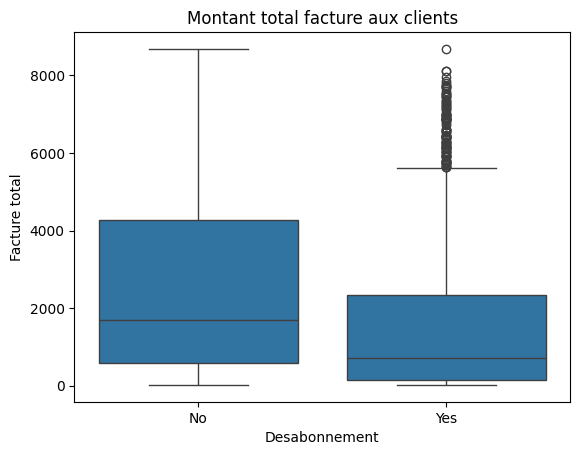

In [15]:
# Analyse  du montant total facture (TotalCharges) d'un client en fonction du desabonnement(Churn)
# TotalCharges(Churn)

sns.boxplot(x = 'Churn', y = 'TotalCharges', data=data)
plt.xlabel('Desabonnement')
plt.ylabel('Facture total')
plt.title('Montant total facture aux clients')
plt.show()

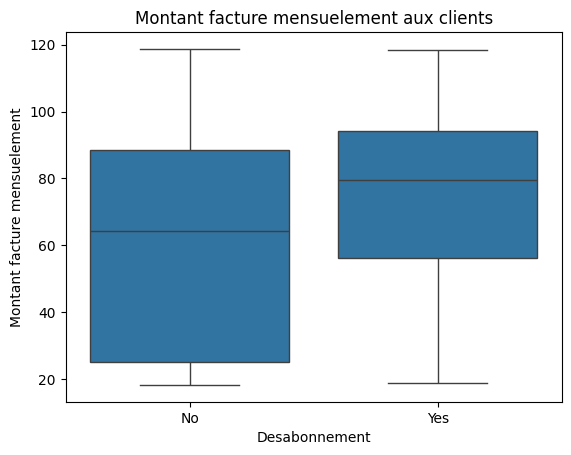

In [16]:
# MontlyCharges(Churn)

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=data)
plt.xlabel('Desabonnement')
plt.ylabel('Montant facture mensuelement')
plt.title('Montant facture mensuelement aux clients')
plt.show()

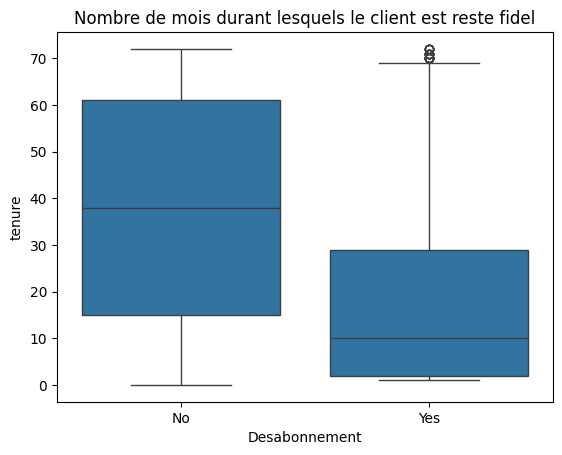

In [17]:
# tenure(Churn)

sns.boxplot(x = 'Churn', y = 'tenure', data=data)
plt.xlabel('Desabonnement')
plt.ylabel('tenure')
plt.title('Nombre de mois durant lesquels le client est reste fidel')
plt.show()

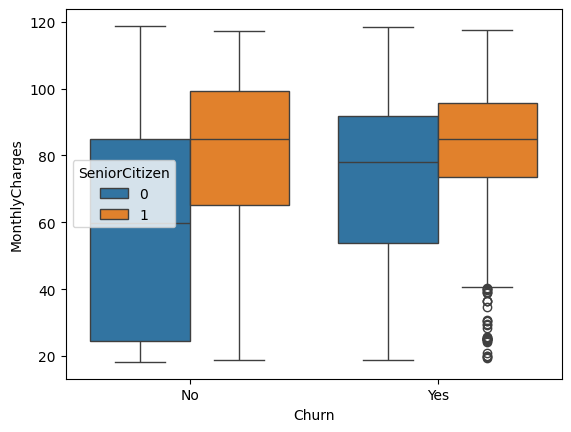

In [18]:
#MontlyCharges vs Churn par SeniorCitizens

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=data, hue='SeniorCitizen')
plt.show()

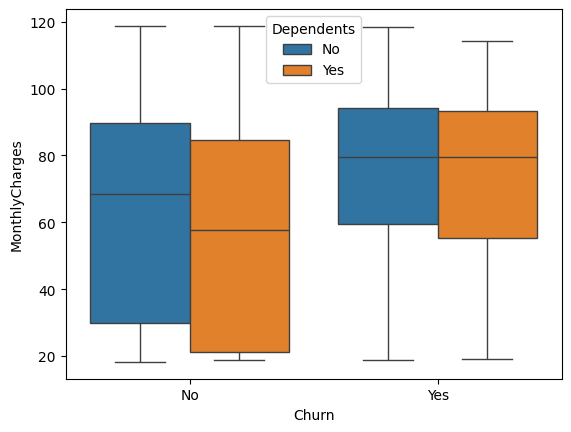

In [19]:
#MontlyCharges vs Churn par SeniorCitizens

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data=data, hue='Dependents')
plt.show()

### Resume statitique

In [20]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Nous remarquons que les 03 variables tenure, MonthlyCharges et TotalCharges on differentes echelles. Pour mieux faire fonctionner notre modele de machine learning il serai judicieux de standardisees ou normalisees nos donnees.

<h2 style="color:orange;">Pretraitement des donnees</h2>

Gestion des valeurs manquante

In [21]:
dataFrame = data.copy()
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Nous avons TotalCharges qui possedes 11 valeurs manquantes.
Nous allons supprimer c'est valeur car ils representent une infime partie du jeu de donnees 11/7043

In [23]:
print(f'pourcentage de valeur manquante =  {11/data.shape[0]}')

pourcentage de valeur manquante =  0.001561834445548772


In [24]:
# =====| suppresion de valeur manquante |========

data.dropna(inplace=True)

data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encodage des variables categoriels binaires

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
data['gender'] = data['gender'].apply(lambda row : 1 if row == 'Female' else 0)

colonnes_binaire = data.drop('gender', axis=1).nunique()[data.drop('gender', axis=1).nunique() < 3].keys().to_list()

colonnes_binaire

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [27]:
for colonne in colonnes_binaire:
    data[colonne] = data[colonne].apply(lambda row : 1 if row == 'Yes' else 0)
    
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Encodage des variables categorielles restantes

In [28]:

remaining_cat_vars = data[variable_categorielle].nunique()[data[variable_categorielle].nunique() > 2].keys().to_list()

remaining_cat_vars_dumies = pd.get_dummies(data = data[remaining_cat_vars], columns=remaining_cat_vars, drop_first=True)

In [29]:
for colonne in remaining_cat_vars_dumies:
    remaining_cat_vars_dumies[colonne] = remaining_cat_vars_dumies[colonne].apply(lambda row : 1 if row == True else 0)


remaining_cat_vars_dumies

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# ====| Nouveau dataset |=====
remaining_cat_vars_dumies
data = pd.concat([data['gender'], data[colonnes_binaire], remaining_cat_vars_dumies, data[colonnes_numerique]], axis=1)

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


In [32]:
print(f'nouvelle dimension du dataset = {data.shape}')

nouvelle dimension du dataset = (7032, 31)


Nous avons remarque que la variable <strong>TotalCharges</strong> est tres asymetrique alors transformons la par une fonction racine carree.

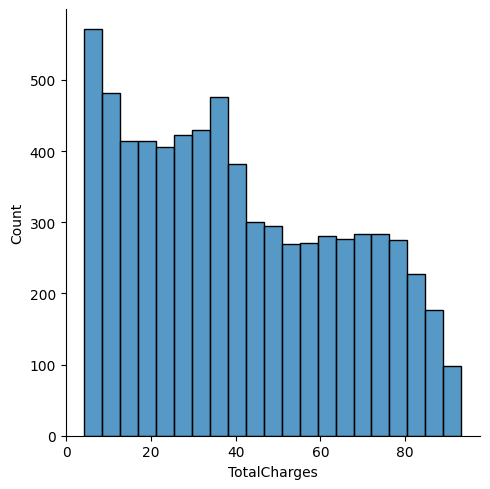

In [33]:
# ======| Transformation de la variable TotalCharges |====
data['TotalCharges'] = np.sqrt(data['TotalCharges'])
sns.displot(data['TotalCharges'], kde=False)
plt.show()

In [34]:
# ======| coeficient d'asymetrie |======
print(data['TotalCharges'].skew())

0.3089261418986736


<h2 style="color:orange;">Division des donnees</h2>

division des donnees en donnees d'entrainement (60%), de validation (20%) et de test (20%)

In [35]:
# ====| donnees d'entrainement (60%), de validation (20%) et de test (20%)

X = data.drop('Churn', axis = 1)
y = data['Churn']

seed = 1111

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state =   seed, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test , test_size=0.5, random_state =   seed, stratify=y_test)

In [36]:
# ===| Frequence des classes dans y_train |=====

print(pd.DataFrame(y_train).value_counts(normalize = True))

Churn
0        0.734297
1        0.265703
Name: proportion, dtype: float64


In [37]:
# ===| Frequence des classes dans y_val |=====

print(pd.DataFrame(y_val).value_counts(normalize = True))

Churn
0        0.733997
1        0.266003
Name: proportion, dtype: float64


In [38]:
# ===| Frequence des classes dans y_test |=====

print(pd.DataFrame(y_test).value_counts(normalize = True))

Churn
0        0.734186
1        0.265814
Name: proportion, dtype: float64


<h2 style="color:orange;">Normalisation des variables</h2>

Ici nous allons resoudre le probleme lie au desequilibre de class dans les donnees.

Nous savons que lorsque il y'a une tres grande difference entre le nombre d'observation dans chaque categorie de variable a predire cela peut entrainer une erreur de modelisation.

En ce qui nous concerne il y'a 73% de personnes qui ne sont pas desabonnees et 27% qui l'on fait. On a donc la un grand desequilibre de classe. Pour resoudre ce probleme nous allons utiliser le <strong style="color:green">Reechantillonage</strong> c'est a dire soit augmenter la classe minioritaire soit diminuer la classe majoritaire.

<h4 style="color:orange;">Resolution du probleme en utilisant le sur-echantillonage</h4>

In [39]:
x2 = x_train
x2['Churn'] = y_train.values

miniority = x2[x2.Churn == 1]
majority = x2[x2.Churn == 0]

miniority_upsampled = resample(miniority, replace=True, n_samples=len(majority), random_state=seed)

upsampled = pd.concat([miniority_upsampled, majority])

# =====| verification |==========

print(f'pourcentage par classe ====( {upsampled["Churn"].value_counts(normalize=True)}')
upsampled


pourcentage par classe ====( Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
5059,1,0,0,0,1,1,0,1,1,0,...,1,0,0,0,1,0,36,99.15,60.129859,1
4226,1,0,1,0,1,1,0,1,1,0,...,0,0,0,0,1,0,3,75.85,16.018739,1
3864,1,0,0,0,1,1,0,1,1,0,...,1,0,0,0,1,0,30,100.20,54.624170,1
1494,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,1,8,19.75,12.041595,1
2869,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,6,91.10,21.337760,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,5,64.35,18.778978,0
5160,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,74.35,8.622645,0
1323,1,0,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,71,24.65,41.353960,0
2685,1,0,1,0,1,0,0,1,1,0,...,0,0,1,0,0,0,72,100.65,85.639068,0


Mise a jour des donnees d'entrainement x_train et y_train

In [40]:
x_train_up = upsampled.drop('Churn', axis = 1)
y_train_up = upsampled['Churn']

<h4 style="color:orange;">Resolution du probleme en utilisant le sous-echantillonage</h4>

In [41]:
majority_dowsammpled = resample(majority, replace=False, n_samples=len(miniority), random_state=seed)

downsampled = pd.concat([miniority, majority_dowsammpled])

print(f'pourcentage par classe ====( {downsampled["Churn"].value_counts(normalize=True)}')
downsampled


pourcentage par classe ====( Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
6908,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,9,55.35,21.207310,1
1530,0,0,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,2,90.00,13.785862,1
3617,1,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,18,48.35,28.472794,1
6800,1,0,1,0,1,0,0,0,1,0,...,1,1,0,0,0,1,14,105.95,36.727374,1
3772,0,0,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,1,95.00,9.746794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,1,0,1,0,1,0,0,1,1,0,...,1,0,1,0,1,0,71,109.25,87.793508,0
3663,1,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,9,88.40,28.082023,0
5033,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,1,19.40,4.404543,0
2183,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,2,50.20,10.452272,0


Mise a jour des donnees d'entrainement x_train et y_train

In [42]:
x_train_down = downsampled.drop('Churn', axis = 1)
y_train_down = downsampled['Churn']

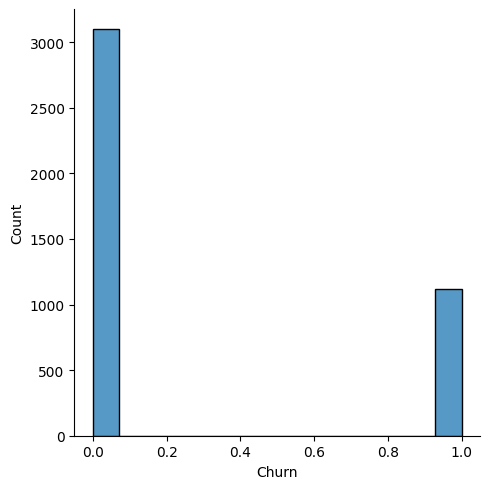

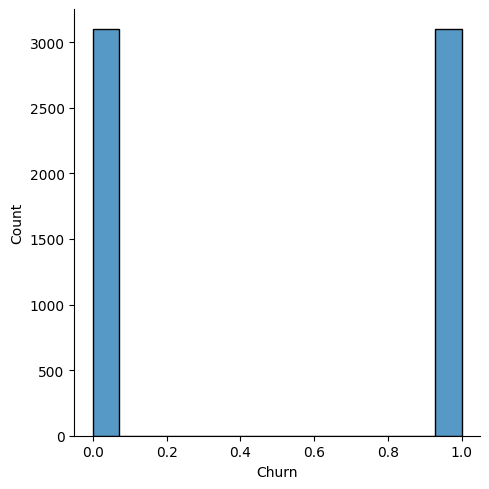

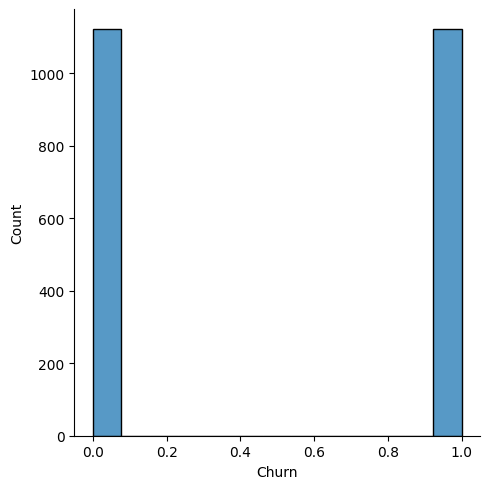

In [43]:
sns.displot(y_train)
sns.displot(y_train_up)
sns.displot(y_train_down)
plt.show()

<h4 style="color:orange;">Definition des donnees d'entrainement</h4>

In [44]:
train_features = x_train_down

train_labels = y_train_down

<h4 style="color:orange;">Normalisation proprement dite des donnees</h4>

In [45]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6908,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,9,55.35,21.207310
1530,0,0,1,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,2,90.00,13.785862
3617,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,18,48.35,28.472794
6800,1,0,1,0,1,0,0,0,1,0,...,0,1,1,0,0,0,1,14,105.95,36.727374
3772,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,95.00,9.746794


Normalisation des variables independantes des differentes ensembles de donnees. Nous choisirons la standaridsation au lieu de la normalisation

In [46]:
scaler = MinMaxScaler()

mod_scaler = scaler.fit(train_features)

train_features = mod_scaler.transform(train_features)


x_val = mod_scaler.transform(x_val)
x_test = mod_scaler.transform(x_test)

# ====| Retransformons en DataFrame |=====
train_features = pd.DataFrame(train_features, columns=X.columns)
x_val = pd.DataFrame(x_val, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)


In [47]:
# =======| verification que tous nos attributs sont entre 0 et 1 |========

train_features.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.369522,0.189873
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014085,0.714641,0.106351
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.239437,0.299801,0.271639
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.183099,0.873506,0.364537
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.764442,0.060895


<h4 style="color:orange;"> Metriques utilisees pour evaluer le modele</h4>

<ul>
    <li> <strong style="color:green;">Accuracy</strong> : c'est la precision global du modele. C'est la proportion de previsions correctes. </li>
    <li> <strong style="color:green;"> Precision </strong> : elle donne les indications sur tous les points positifs predits </li>
    <li> <strong style="color:green;"> Recall (rappel) </strong> : elle montre la capacite du modele a identifier les vrais positifs </li>
    <li> <strong style="color:green;"> F1 score </strong> : C'est la moyenne harmonique de precision et de recall. Pour un bon modele le f1 score est egale a 1 et 0 pour un mauvais modele. </li>
</ul>

Lorsqu'il y a un probleme de desequilibre de classe la precision global(accuracy) n'est pas une metrique d'evaluation de performance du model.

<h2 style="color:orange;"> Modelisation</h2>

<h4 style="color:orange;"> Selectionnons les meilleurs variables pour la modelisation</h4>

In [48]:
rf = RandomForestClassifier()

rf.fit(train_features, train_labels)

print(classification_report(y_val, rf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1032
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1406
   macro avg       0.69      0.74      0.70      1406
weighted avg       0.79      0.73      0.75      1406



<h4 style="color:orange;"> Importance des variables independantes</h4>

/tmp/ipykernel_6561/2748519695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vars_imp.index, y=vars_imp, palette='muted')


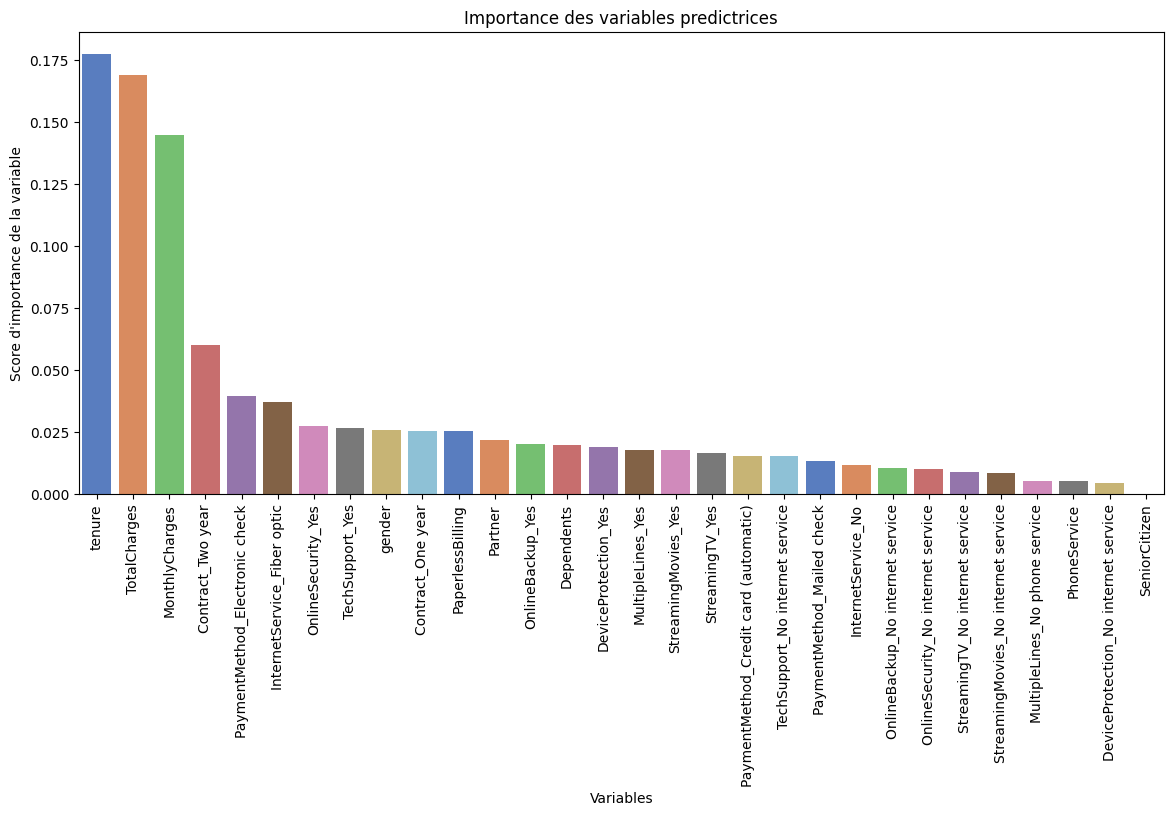

In [49]:

plt.figure(figsize=(14, 6))

vars_imp = pd.Series(rf.feature_importances_, index=train_features.columns).sort_values(ascending=False)
sns.barplot(x = vars_imp.index, y=vars_imp, palette='muted')

plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables predictrices")
plt.show()

affichage des variables par ordre decroissant d'importance

In [50]:
print(vars_imp)

tenure                                   0.177593
TotalCharges                             0.168947
MonthlyCharges                           0.144772
Contract_Two year                        0.060101
PaymentMethod_Electronic check           0.039630
InternetService_Fiber optic              0.036941
OnlineSecurity_Yes                       0.027416
TechSupport_Yes                          0.026524
gender                                   0.025873
Contract_One year                        0.025579
PaperlessBilling                         0.025540
Partner                                  0.021899
OnlineBackup_Yes                         0.019988
Dependents                               0.019690
DeviceProtection_Yes                     0.018869
MultipleLines_Yes                        0.017877
StreamingMovies_Yes                      0.017548
StreamingTV_Yes                          0.016684
PaymentMethod_Credit card (automatic)    0.015430
TechSupport_No internet service          0.015228


<h4 style="color:orange;"> Selection des variables les plus importantes en fonction d'un seuil</h4>

In [51]:
seuil = 0.006

vars_selected = vars_imp[vars_imp > seuil].index.to_list()


train_features = train_features[vars_selected]

x_val = x_val[vars_selected]

x_test = x_test[vars_selected]



In [52]:
print(f"nombre de variable selectionnee = {len(vars_selected)}")

nombre de variable selectionnee = 26


<h4 style="color:orange;"> Modele de Regression logistique</h4>

In [53]:
# ======| dictionnaire des hyperparametre |=====

param_grid = {'C':[0.001, 0.01, 1, 10, 10, 50, 100, 500]}

# =======| objet GridSearchCV |=======

grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=50), param_grid=param_grid, scoring='f1', cv=5)


# =======|  Entrainement de l'algorithme |======

logred_model = grid_logreg_class.fit(train_features, train_labels)

# =========| meilleur score et meilleur hyperparametre
print(round(logred_model.best_score_, 3))


print(f'meilleur modele : {logred_model.best_estimator_}')



0.783
meilleur modele : LogisticRegression(C=1, max_iter=50, random_state=1111)


fonction permettant d'evaluer un algorithme

In [54]:
def model_evaluation(model, features, labels):
    pred = model.predict(features)
    print(classification_report(labels, pred))

Evaluation du modele de regression logistique

In [55]:
model_evaluation(logred_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



<h4 style="color:orange;"> Realisation d'une RFE (Recursive Feature Eliminator)</h4> 

Elle permet de classer les predicteurs dans l'ordre d'importance en eliminant de maniere recursive ceux qui ne sont pas important. C'est a dire qui n'affecte pas la qualite du modele.

<strong>C'est une methode de reduction de la dimensionnalite</strong>

<h3> <strong>Modelisation</strong> </h3>

In [56]:
# =====| creation du modele |======

log_model = LogisticRegression()

# =====| Entrainement |==========

log_model.fit(train_features, train_labels)

LogisticRegression()

In [57]:
# =======| precision globale du modele sur les donnees d'entrainement |=======

model_evaluation(log_model, train_features, train_labels)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1121
           1       0.76      0.81      0.79      1121

    accuracy                           0.78      2242
   macro avg       0.78      0.78      0.78      2242
weighted avg       0.78      0.78      0.78      2242



In [58]:
# =======| precision globale du modele sur les donnees de test |=======

model_evaluation(log_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



<h3> <strong>Recursive Feature Eliminator (RFE)</strong> </h3>

In [59]:
# ======| Appliquons la RFE sur le modele de regression logistique |========

rfe_model = RFE(estimator=log_model, verbose=1)

rfe_model.fit(train_features, train_labels)

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


RFE(estimator=LogisticRegression(), verbose=1)

In [60]:
# ========| Masque de determination des variables selectionnees (indices des variables selectionnees)

mask = rfe_model.support_

mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True, False, False])

In [61]:
# ======| affichage des variable selectionnees par le RFE |=======
reduced_x = train_features.loc[:, mask]

reduced_x.columns

Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_No internet service',
       'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service'],
      dtype='object')

In [62]:
# ============| Performance d'entrainement du modele rfe_model |=========

model_evaluation(rfe_model, train_features, train_labels)

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1121
           1       0.76      0.81      0.78      1121

    accuracy                           0.77      2242
   macro avg       0.78      0.77      0.77      2242
weighted avg       0.78      0.77      0.77      2242



In [63]:
# ============| Performance de test du modele rfe_model |=========

model_evaluation(rfe_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1033
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



<h3> <strong>Recursive Feature Eliminator (RFE) avec 9 predicteurs</strong> </h3>

In [64]:
nombre_propriete = 9


# ======| Appliquons la RFE sur le modele de regression logistique avec 09 variables |========

rfe_model2 = RFE(estimator=log_model, verbose=1, n_features_to_select=nombre_propriete)

rfe_model2.fit(train_features, train_labels)

# ========| Masque de determination des variables selectionnees (indices des variables selectionnees)

mask2 = rfe_model.support_


# ======| affichage des variable selectionnees par le RFE |=======
reduced2_x = train_features.loc[:, mask2]

reduced2_x.columns

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_No internet service',
       'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service'],
      dtype='object')

In [65]:
# ============| Performance de test du modele rfe_model |=========

model_evaluation(rfe_model2, x_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [66]:
# ======| Creation d'une fonction de construction d'un modele avec utilisation de l'algorithme RFE |=====

def model_with_rfe(model):
    rfe_model = RFE(estimator=model, verbose=0)
    rfe_model.fit(train_features, train_labels)
    mask = rfe_model.support_
    reduced_x = train_features.loc[:, mask]
    print(reduced_x.columns)
    return rfe_model

In [67]:
rfe_logreg_model = model_with_rfe(logred_model.best_estimator_)

Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_No internet service',
       'OnlineBackup_No internet service',
       'OnlineSecurity_No internet service'],
      dtype='object')


In [68]:
model_evaluation(rfe_logreg_model, x_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1032
           1       0.50      0.77      0.61       374

    accuracy                           0.73      1406
   macro avg       0.70      0.75      0.70      1406
weighted avg       0.79      0.73      0.75      1406



<h3 style="color:orange;"> Modelisation foret aleatoire </h3>

In [69]:
# =====| Dictionnaire des hyperparametres |======

param_grid_rf = {'n_estimators':[10, 50, 100, 500, 1000], 'max_depth':[3, 5, 20, None]}


# ======| Objet GridSearchCV |=========

grid_rf_class = GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid_rf, scoring='f1', cv=5)

# ======| Entrainement de l'algorithme |=======

rf_model =  grid_rf_class.fit(train_features, train_labels)

# ======| Meilleur score et meilleur hyperparametre |======

print(round(rf_model.best_score_, 3))

print(rf_model.best_estimator_)



 

0.784
RandomForestClassifier(max_depth=5, random_state=1111)


In [84]:
# =======| Evaluation du modele de foret aleatoire |========

model_evaluation(rf_model.best_estimator_, x_val, y_val)



              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1032
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1406
   macro avg       0.70      0.74      0.70      1406
weighted avg       0.79      0.73      0.74      1406



<h4> <strong>Random Forest avec RFE</strong> </h4>


In [73]:
rfe_forest_model = model_with_rfe(rf_model.best_estimator_)

rfe_forest_model

Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'OnlineSecurity_Yes', 'Contract_One year',
       'TechSupport_No internet service', 'InternetService_No',
       'OnlineSecurity_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=5, random_state=1111))

In [85]:
# ============| Performance de test du modele rfe_forest_model |=========

model_evaluation(rfe_forest_model, x_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1032
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1406
   macro avg       0.70      0.75      0.71      1406
weighted avg       0.80      0.74      0.75      1406



<h3 style="color:orange;"> Construction d'un modele en utilisant le Perceptron multicouche </h3>

In [75]:
mlp = MLPClassifier(random_state=seed, max_iter=200)

parametres = {'hidden_layer_sizes':[(50,), (100,), (200,)], 
            #   'activation':['identity', 'logistic', 'tanh', 'relu'], 
              'learning_rate':['constant', 'invscaling', 'adaptive']}


mlp_cv = GridSearchCV(mlp, parametres, scoring='f1', cv=5, n_jobs=-1)

mlp_cv.fit(train_features, train_labels)

/home/pharaon/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pharaon/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pharaon/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pharaon/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pharaon/.local/lib/python3.10/site-pac

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1111), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='f1')

In [77]:
# ======| Meilleur score et meilleur hyperparametre |======

print(round(rf_model.best_score_, 3))

print(rf_model.best_estimator_)

0.784
RandomForestClassifier(max_depth=5, random_state=1111)


In [86]:
# ======| Evaluation du modele reseau de neurone |======

model_evaluation(mlp_cv, x_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1032
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.79      0.72      0.74      1406



<h3 style="color:orange;"> Support Vector Machine SVM </h3>

In [81]:
svm_model = SVC(random_state=seed)

svc_parameters = {'kernel':['linear', 'rbf'], 'C':[0.1, 1.0, 10, 50, 100]}

svm_cv = GridSearchCV(svm_model, svc_parameters, scoring='f1', cv=5)

svm_cv.fit(train_features, train_labels)

print(round(svm_cv.best_score_, 3))

print(svm_cv.best_estimator_)



0.778
SVC(C=0.1, kernel='linear', random_state=1111)


Evaluation du modele

In [87]:
model_evaluation(svm_cv, x_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1032
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.79      0.72      0.73      1406



<h3 style="color:orange;"> Selection du meilleur modele </h3>

modele de regression logistique

In [97]:
model_evaluation(rfe_logreg_model, x_val, y_val)
print("---------------------------------------------------------")
model_evaluation(rfe_logreg_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1032
           1       0.50      0.77      0.61       374

    accuracy                           0.73      1406
   macro avg       0.70      0.75      0.70      1406
weighted avg       0.79      0.73      0.75      1406

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1033
           1       0.52      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



modele de foret aleatoire

In [96]:
model_evaluation(rfe_forest_model, x_val, y_val)
print("---------------------------------------------------------")
model_evaluation(rfe_forest_model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1032
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1406
   macro avg       0.70      0.75      0.71      1406
weighted avg       0.80      0.74      0.75      1406

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



modele de perceptron multicouche

In [98]:
model_evaluation(mlp_cv, x_val, y_val)
print("---------------------------------------------------------")
model_evaluation(mlp_cv, x_test, y_test)



              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1032
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.79      0.72      0.74      1406

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407



modele obtenu a partir de SVM

In [99]:
model_evaluation(svm_cv, x_val, y_val)
print("---------------------------------------------------------")
model_evaluation(svm_cv, x_test, y_test)


              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1032
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.79      0.72      0.73      1406

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407



<h3 style="color:orange;">
Apres comparaison des performances des differents modeles sur des donnees d'evaluation et de test il en ressort que :

Tous les modeles n'ont pas sur appris, et l'algorithme ayant produit de meilleur performance est <strong style="color:blue;">La Foret Aleatoire avec une une accuracy de 0.75</strong>
</h3>